In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)

## correr hasta salvar como html o pdf.
%%html
<style>
div.input {
    display:none;
}
</style>

In [3]:
df=pd.read_csv('http://allman.rhon.itam.mx/~ebarrios/EstApl2-2019/controles/control4/datosFit.csv')

In [4]:
df.head(5)

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,148,ActiveHybrid 7L,2013,84300.00,18.18,25.00,25.00,L,2
1,42,ML450 Blue HV,2009,60519.83,12.60,23.99,23.99,SUV,6
2,36,Crown,2008,62290.38,8.70,37.16,37.16,M,3
3,38,F3DM,2008,23744.06,9.52,30.11,85.00,M,3
4,61,ActiveHybrid 7,2010,104300.43,20.41,22.11,22.11,L,2


<center><h1>Control 4: Precio de Vehículos Híbridos</h1></center>

<center>
    <h2>Friteam</h2>
    <br>150344<br>157043<br>158391
</center>

* Introducción
* Resumen del artículo
* Análisis exploratorio
* Modelos
* Comentarios sobre pronóstico
* Conclusiones

## Sección 1
### Introducción

Los vehículos híbridos representan un misterio en el mercado a lo largo de los años, existen ciertos tabúes o hasta prejuicios de su desempeño al igual que el que existe alrededor de los autos eléctricos. Este artículo busca explorar como es que el precio de un auto híbrido puede estar influenciado por otras variables interesantes, como puede ser la tasa de aceleración o las millas por galón.

## Rotter y emiliano cambien o pongan lo que quieran

## Sección 2 
### Resumen del artículo

## emiliano rifate este pex

## Sección 3
### Análisis Exploratorio

## Rotter echate los boxens y las normales y lo que creas que falte o comentar.

Nuestros datos:

In [5]:
df.sample(5)

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
36,129,Q5,2013,50900.00,14.71,26.00,26.00,SUV,6
18,20,Escape 2WD,2005,19322.56,9.52,29.00,29.00,SUV,6
14,108,ActiveHybrid 5,2012,61132.11,17.54,26.00,26.00,M,3
13,49,SAI,2009,39172.44,11.55,54.10,54.10,M,3
35,43,Prius (3rd Gen),2009,24641.18,9.60,47.98,47.98,C,1


In [16]:
df = df.drop(["carid", "carclass_id"], axis=1)

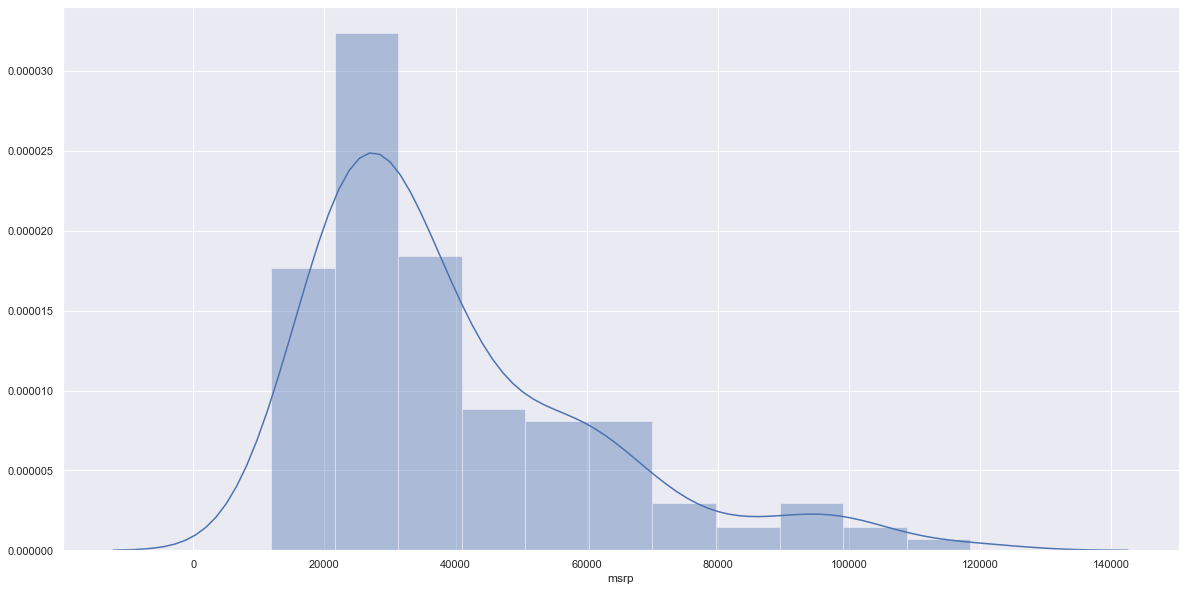

In [17]:
sns.set()
sns.distplot(df.msrp)

Como no se ve normal, vamos a trabajar con el logaritmo.

In [97]:
df["msrp"] = np.log(df.msrp)

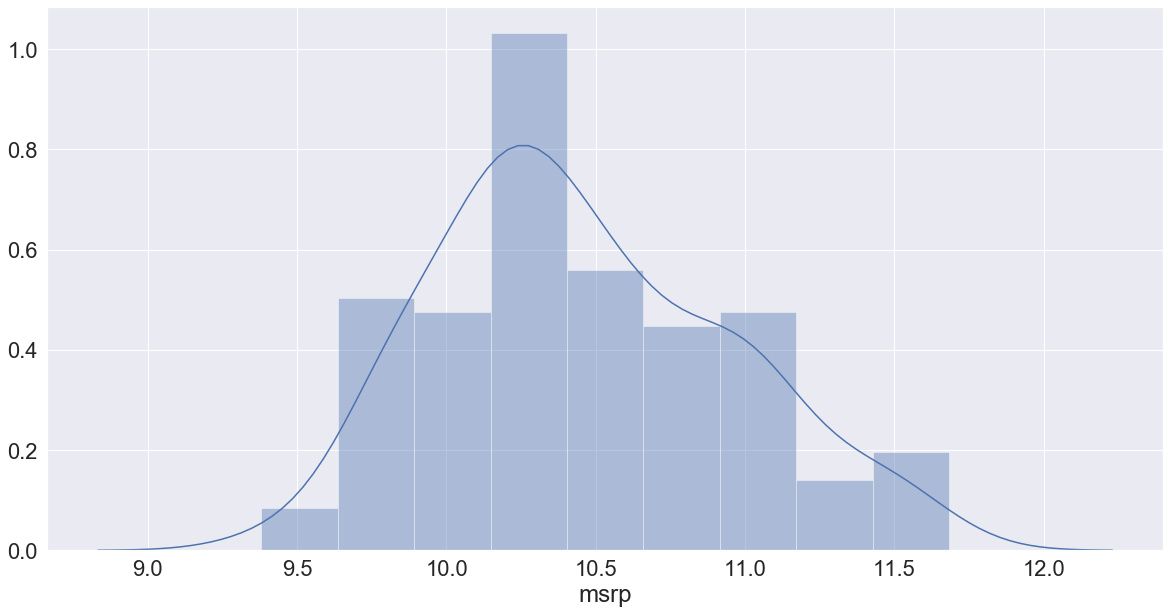

In [115]:
sns.distplot(df.msrp)

Precio contra algunas variables

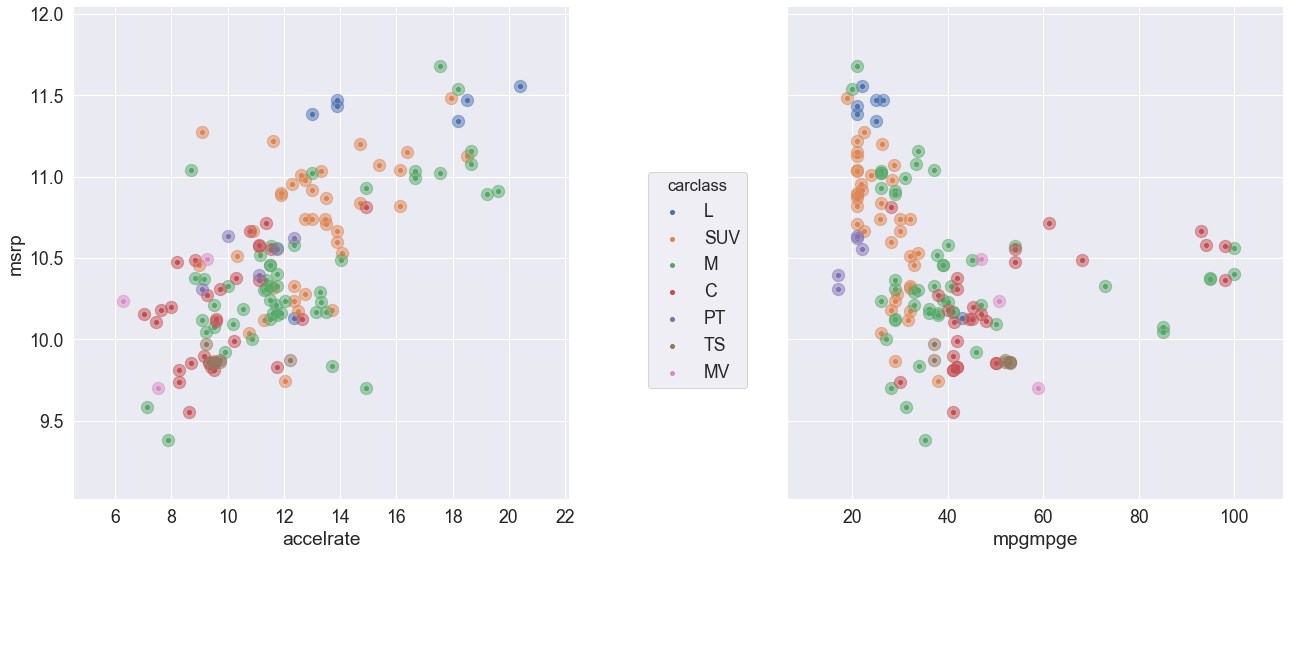

In [98]:
sns.set(font_scale=1.6)
g=sns.pairplot(data=df,hue='carclass',y_vars=['msrp'],x_vars=['accelrate','mpgmpge'])
g.map(plt.scatter, s=150,alpha=.5)
g._legend.set_bbox_to_anchor((.35, 0.35))
g._legend.set_frame_on(True)
g.fig.set_figheight(15)
g.fig.set_figwidth(30)

Observemos que el precio parece crecer con la tasa de aceleración, y que el rendimiento (`mpgmpge`) no tiene ese patrón. Dentro de los vehículos con bajo rendimiento el precio se ve mucho más afectado por el tipo de vehículo (las SUVs rinden poco y son caras).

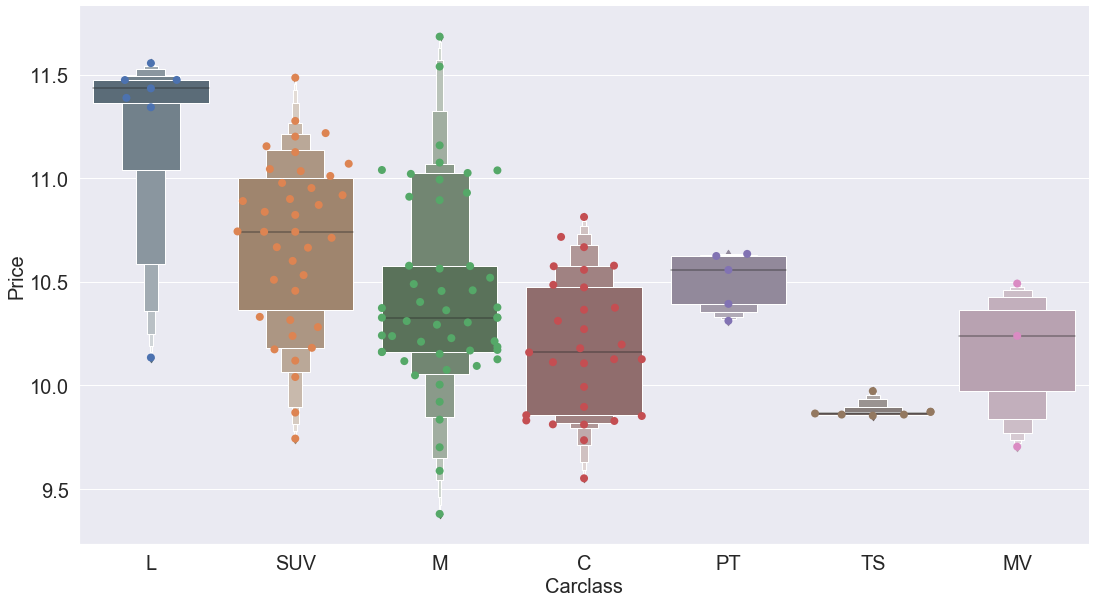

In [99]:
g=sns.catplot(x='carclass',y='msrp',hue='carclass', kind="swarm", data=df,s=8)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)
#ax=sns.scatterplot(x='carclass',y='msrp',hue='carclass',size='mpg',data=df,alpha=.5,legend=False,zorder=10,x_jitter=2,sizes=(200, 800))
b=sns.boxenplot(x='carclass',y='msrp',data=df,palette='tab10',saturation=.2)
b.set_ylabel('Price',fontsize=20)
b.set_xlabel('Carclass',fontsize=20)
b.tick_params(labelsize=20)

En mediana, los autos de clase `L` son mucho más caros que los demás, que se mantienen en general en el rango de 30 a 50 mil. 
Los de clase `TS` tienen mucha menor variabilidad en el precio. Los más variables son las camionetas (porque hay una muy barata) y los medianos porque hay una muy caro.

Esto indica que tal vez podamos reducir dimensiones con una variable que distinga las dos clases más caras de las demás.

In [100]:
df["large"] = df.carclass == "L"

Algunos visualizaciones con temporalidad.

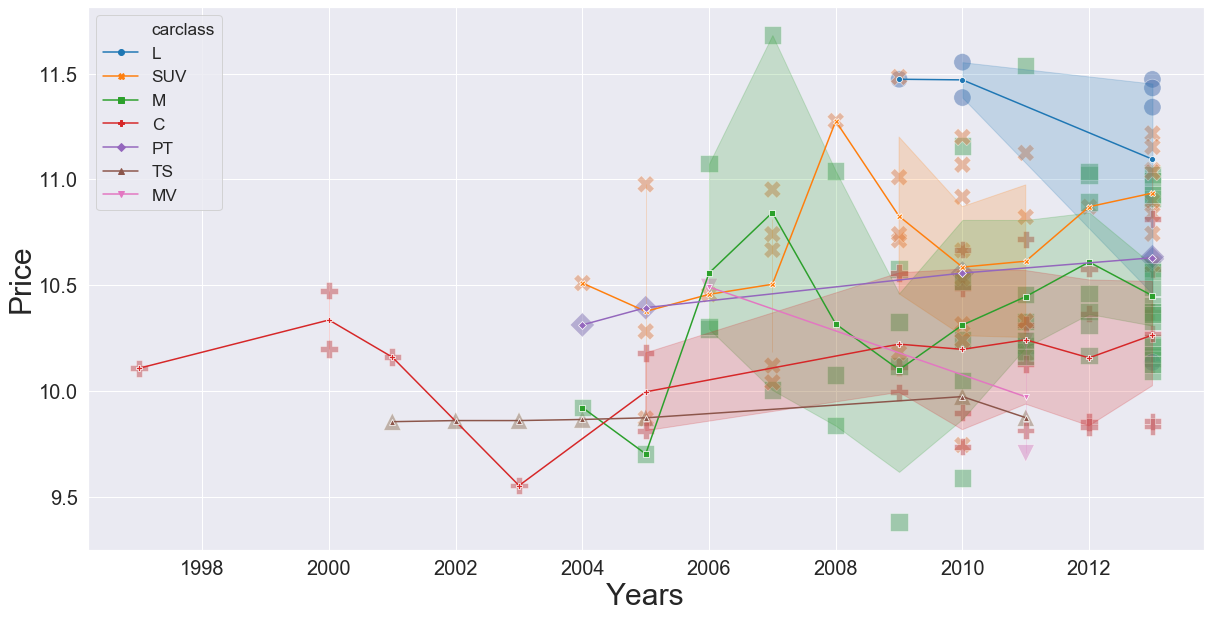

In [101]:
sns.set()
plt.rcParams['figure.figsize'] = (20, 10)
ax=sns.scatterplot(x='year',y='msrp',hue='carclass',data=df,style='carclass',s=300,alpha=.5,legend=False)
ax = sns.lineplot(x="year", y="msrp", hue='carclass' ,style="carclass", markers=True, dashes=False,
                  data=df.dropna(),palette='tab10')
ax.legend(fontsize='x-large')
ax.set_ylabel('Price',fontsize=30)
ax.set_xlabel('Years',fontsize=30)
ax.tick_params(labelsize=20)

A lo largo del tiempo, se ha mantenido esta diferencia de precios entre clases.

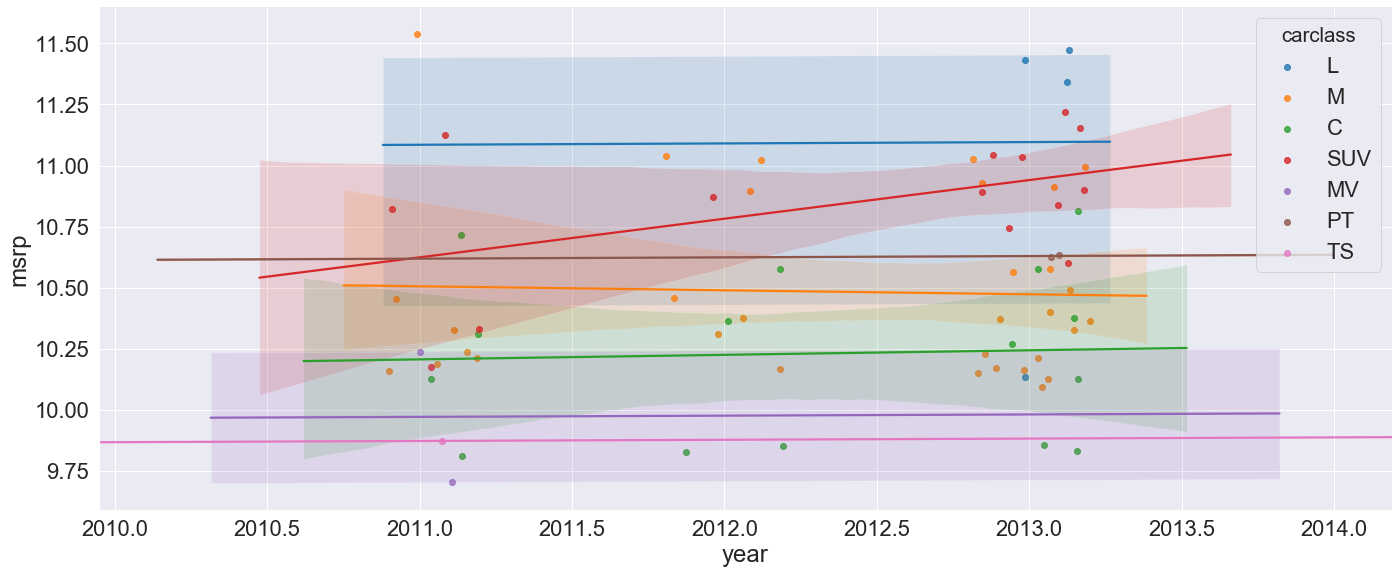

In [102]:
sns.set(font_scale=2)
g=sns.lmplot(x='year',y='msrp',data=df.loc[df.year>2010],hue='carclass',x_jitter=.2,palette='tab10',legend_out=False)
g.fig.set_figheight(10)
g.fig.set_figwidth(30)

Eliminando un poco de ruido visual es más claro que la clase de vehículo parece tener más impacto que el paso de los años. 

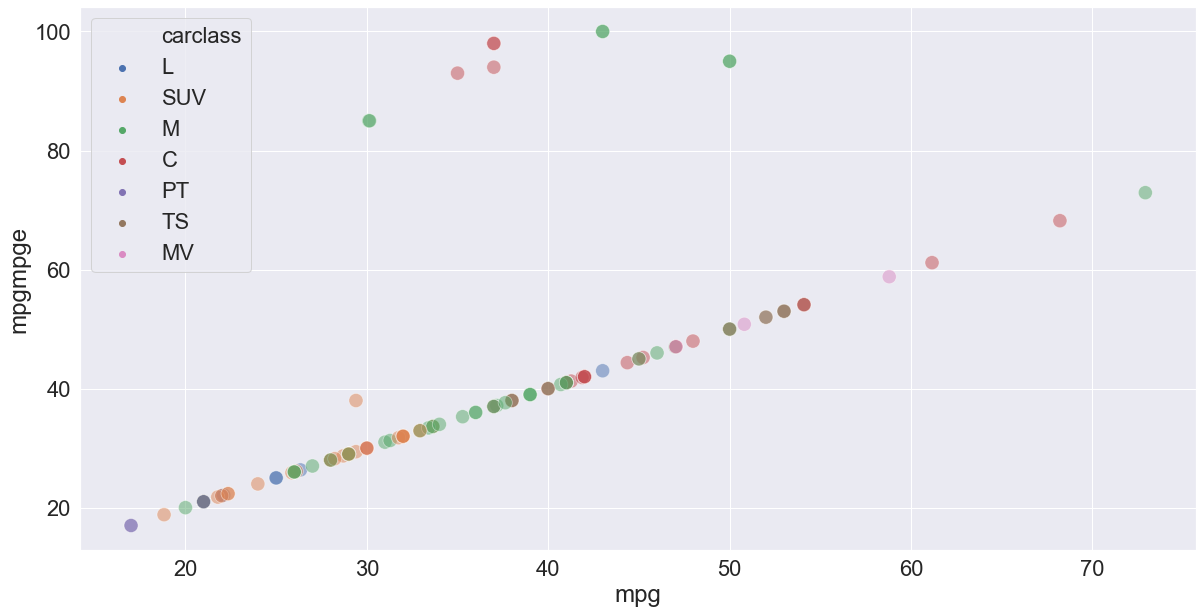

In [103]:
sns.scatterplot(x='mpg',y='mpgmpge',data=df,hue='carclass',s=200,alpha=.5)

En los autos que tienen `mpge` es muy superior. Esto indica que una buena combinación de variables es `mpg` y una indicadora de si es uno de los 7 puntos sobre la identidad.

In [104]:
df["efficient"] = df.mpgmpge>df.mpg

In [105]:
df.sample(10)

,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,efficient,large
77,Aura,2007,10.003825,10.87,27.00,27.00,M,False,False
37,Touareg,2013,11.044121,16.13,21.00,21.00,SUV,False,False
57,Silverado 15 2WD,2004,10.311936,9.09,17.00,17.00,PT,False,False
17,Aspen HEV,2009,10.712277,13.51,21.00,21.00,SUV,False,False
120,S400,2010,11.387507,12.99,21.00,21.00,L,False,True
97,Freed/Freed Spike,2011,10.238962,6.29,50.81,50.81,MV,False,False
60,Insight,2005,9.872397,9.71,52.00,52.00,TS,False,False
56,Panamera S,2013,11.473665,18.52,25.00,25.00,L,False,True
2,Crown,2008,11.039562,8.70,37.16,37.16,M,False,False
64,Sierra 15 2WD,2013,10.634773,10.00,21.00,21.00,PT,False,False


## Sección 4
### Modelos

In [116]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [117]:
df.sample(10)

,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,efficient,large
13,SAI,2009,10.575729,11.55,54.10,54.10,M,False,False
108,Prius,2013,10.094108,10.20,50.00,50.00,M,False,False
28,CT 200h,2013,10.375052,10.31,42.00,42.00,C,False,False
96,Insight,2011,9.812160,9.52,41.00,41.00,C,False,False
64,Sierra 15 2WD,2013,10.634773,10.00,21.00,21.00,PT,False,False
114,MKZ FWD,2013,10.489189,14.03,45.00,45.00,M,False,False
123,Cayenne S,2013,11.154105,16.39,21.00,21.00,SUV,False,False
27,Silverado 15 2WD,2013,10.624615,12.35,21.00,21.00,PT,False,False
63,GMC Yukon,2007,10.952468,12.28,21.78,21.78,SUV,False,False
104,Tribute,2007,10.119559,11.28,31.75,31.75,SUV,False,False


Antes de usar herramientas automáticas vamos a intentar por intuición.

In [118]:
mod1 = smf.ols("msrp~accelrate", data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.85e-21
Time:                        18:49:32   Log-Likelihood:                -52.722
No. Observations:                 140   AIC:                             109.4
Df Residuals:                     138   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0705      0.126     71.972      0.000       8.821       9.320
accelrate      0.1160      0.010     11.335      0.000       0.096       0.136
==============================================================================
Omnibus:                        4.536   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.548
Skew:                           0.258   Prob(JB):                        0.103
Kurtosis:                       3.717   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
mod2 = smf.ols("msrp ~ C(carclass)", data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.85e-21
Time:                        18:49:33   Log-Likelihood:                -52.722
No. Observations:                 140   AIC:                             109.4
Df Residuals:                     138   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0705      0.126     71.972      0.000       8.821       9.320
accelrate      0.1160      0.010     11.335      0.000       0.096       0.136
==============================================================================
Omnibus:                        4.536   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.548
Skew:                           0.258   Prob(JB):                        0.103
Kurtosis:                       3.717   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
mod2 = smf.ols("msrp ~ C(large)", data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.85e-21
Time:                        18:49:33   Log-Likelihood:                -52.722
No. Observations:                 140   AIC:                             109.4
Df Residuals:                     138   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0705      0.126     71.972      0.000       8.821       9.320
accelrate      0.1160      0.010     11.335      0.000       0.096       0.136
==============================================================================
Omnibus:                        4.536   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.548
Skew:                           0.258   Prob(JB):                        0.103
Kurtosis:                       3.717   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
mod1 = smf.ols("msrp ~ accelrate + C(large)", data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     72.22
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           3.83e-22
Time:                        18:49:33   Log-Likelihood:                -48.391
No. Observations:                 140   AIC:                             102.8
Df Residuals:                     137   BIC:                             111.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.1591      0.126     72.553      0.000       8.909       9.409
C(large)[T.True]     0.4150      0.140      2.957      0.004       0.138       0.692
accelrate            0.1069      0.010     10.248      0.000       0.086       0.128
==============================================================================
Omnibus:                        2.999   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.909
Skew:                           0.131   Prob(JB):                        0.233
Kurtosis:                       3.656   Cond. No.                         63.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
mod4 = smf.ols("msrp ~ accelrate + C(large) + mpg + C(efficient)", data=df).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     41.31
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.42e-22
Time:                        18:49:34   Log-Likelihood:                -42.838
No. Observations:                 140   AIC:                             95.68
Df Residuals:                     135   BIC:                             110.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.7171      0.213     45.545      0.000       9.295      10.139
C(large)[T.True]         0.4036      0.136      2.968      0.004       0.135       0.673
C(efficient)[T.True]     0.0670      0.106      0.631      0.529      -0.143       0.277
accelrate                0.0887      0.012      7.591      0.000       0.066       0.112
mpg                     -0.0099      0.003     -3.294      0.001      -0.016      -0.004
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.321
Skew:                          -0.006   Prob(JB):                        0.313
Kurtosis:                       3.631   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
mod = smf.ols("msrp ~ accelrate + C(large) + mpg", data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     55.19
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           2.12e-23
Time:                        18:49:34   Log-Likelihood:                -43.044
No. Observations:                 140   AIC:                             94.09
Df Residuals:                     136   BIC:                             105.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.7290      0.212     45.883      0.000       9.310      10.148
C(large)[T.True]     0.4013      0.136      2.959      0.004       0.133       0.669
accelrate            0.0880      0.012      7.582      0.000       0.065       0.111
mpg                 -0.0099      0.003     -3.285      0.001      -0.016      -0.004
==============================================================================
Omnibus:                        1.948   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.651
Skew:                          -0.011   Prob(JB):                        0.438
Kurtosis:                       3.532   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
mod4 = smf.ols("msrp ~ accelrate + C(large) + mpgmpge", data=df).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     48.28
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           2.60e-21
Time:                        18:49:34   Log-Likelihood:                -48.024
No. Observations:                 140   AIC:                             104.0
Df Residuals:                     136   BIC:                             115.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.2586      0.173     53.620      0.000       8.917       9.600
C(large)[T.True]     0.4105      0.141      2.920      0.004       0.133       0.689
accelrate            0.1032      0.011      9.141      0.000       0.081       0.126
mpgmpge             -0.0014      0.002     -0.845      0.399      -0.005       0.002
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.800
Skew:                           0.076   Prob(JB):                        0.407
Kurtosis:                       3.534   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eso fue la intuición, a ver un proceso automatizado.

In [125]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [126]:
dfsklearn = pd.get_dummies(df.drop("vehicle", axis=1), drop_first=True)

In [127]:
dfsklearn

,year,msrp,accelrate,mpg,mpgmpge,efficient,large,carclass_L,carclass_M,carclass_MV,carclass_PT,carclass_SUV,carclass_TS
0,2013,11.342137,18.18,25.00,25.00,False,True,1,0,0,0,0,0
1,2009,11.010726,12.60,23.99,23.99,False,False,0,0,0,0,1,0
2,2008,11.039562,8.70,37.16,37.16,False,False,0,1,0,0,0,0
3,2008,10.075088,9.52,30.11,85.00,True,False,0,1,0,0,0,0
4,2010,11.555031,20.41,22.11,22.11,False,True,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2010,10.238828,12.35,29.00,29.00,False,False,0,0,0,0,1,0
136,2009,11.484916,17.96,18.82,18.82,False,False,0,0,0,0,1,0
137,2010,10.315430,11.63,32.00,32.00,False,False,0,0,0,0,1,0
138,2012,9.828510,9.42,42.00,42.00,False,False,0,0,0,0,0,0


In [138]:
X = dfsklearn.drop("msrp", axis=1).to_numpy()
Y = dfsklearn.msrp.to_numpy()

In [139]:
selector = RFECV(reg, cv=5)

In [140]:
dfsklearn.drop("msrp", axis=1).columns[selector.fit(X, Y).support_]

Index(['accelrate', 'efficient', 'large', 'carclass_L', 'carclass_MV',
       'carclass_PT', 'carclass_SUV', 'carclass_TS'],
      dtype='object')

In [133]:
model_sklearn = smf.ols("msrp ~ accelrate + C(efficient) + C(large) + C(carclass)", data=df).fit()
model_sklearn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     22.69
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.91e-21
Time:                        18:51:42   Log-Likelihood:                -37.916
No. Observations:                 140   AIC:                             93.83
Df Residuals:                     131   BIC:                             120.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.1956      0.131     70.256      0.000       8.937       9.454
C(efficient)[T.True]     0.0922      0.106      0.870      0.386      -0.118       0.302
C(large)[T.True]         0.2442      0.077      3.164      0.002       0.091       0.397
C(carclass)[T.L]         0.2442      0.077      3.164      0.002       0.091       0.397
C(carclass)[T.M]        -0.0373      0.083     -0.453      0.652      -0.201       0.126
C(carclass)[T.MV]        0.1812      0.201      0.901      0.369      -0.217       0.579
C(carclass)[T.PT]        0.2236      0.160      1.399      0.164      -0.093       0.540
C(carclass)[T.SUV]       0.1951      0.089      2.181      0.031       0.018       0.372
C(carclass)[T.TS]       -0.3046      0.139     -2.193      0.030      -0.579      -0.030
accelrate                0.0999      0.012      8.631      0.000       0.077       0.123
==============================================================================
Omnibus:                        5.569   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                8.482
Skew:                          -0.026   Prob(JB):                       0.0144
Kurtosis:                       4.205   Cond. No.                     2.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

La multiocolinealidad que advierte el software era de esperarse por incluir `carclass` y `large`. Mejor nos quedamos con una solamente.

In [141]:
best = smf.ols("msrp ~ accelrate + C(efficient) + C(carclass) + mpg", data=df).fit()
best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     20.46
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           4.29e-21
Time:                        18:53:10   Log-Likelihood:                -37.033
No. Observations:                 140   AIC:                             94.07
Df Residuals:                     130   BIC:                             123.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.4716      0.251     37.683      0.000       8.974       9.969
C(efficient)[T.True]     0.0884      0.106      0.836      0.405      -0.121       0.298
C(carclass)[T.L]         0.4339      0.160      2.717      0.007       0.118       0.750
C(carclass)[T.M]        -0.0600      0.084     -0.712      0.478      -0.226       0.107
C(carclass)[T.MV]        0.2123      0.202      1.051      0.295      -0.187       0.612
C(carclass)[T.PT]        0.1081      0.183      0.591      0.556      -0.254       0.470
C(carclass)[T.SUV]       0.1250      0.105      1.196      0.234      -0.082       0.332
C(carclass)[T.TS]       -0.2815      0.140     -2.015      0.046      -0.558      -0.005
accelrate                0.0942      0.012      7.623      0.000       0.070       0.119
mpg                     -0.0050      0.004     -1.285      0.201      -0.013       0.003
==============================================================================
Omnibus:                        4.884   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                6.711
Skew:                          -0.068   Prob(JB):                       0.0349
Kurtosis:                       4.064   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Igual este quedó mejor.

### Análisis del ajuste

In [142]:
from statsmodels.graphics.gofplots import ProbPlot

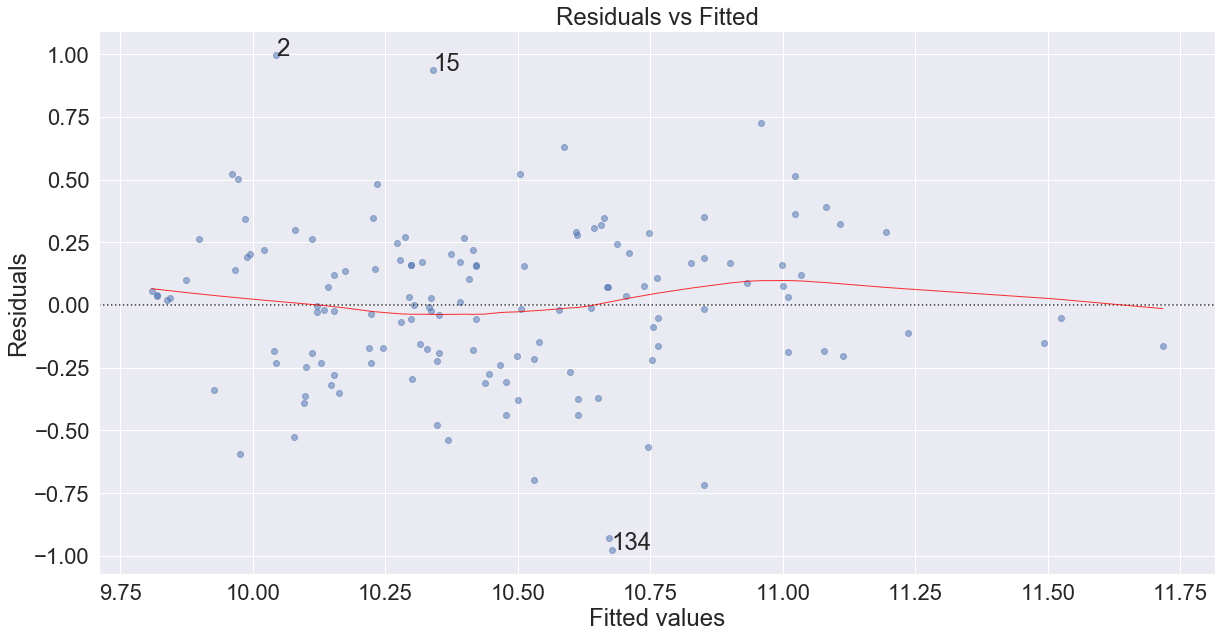

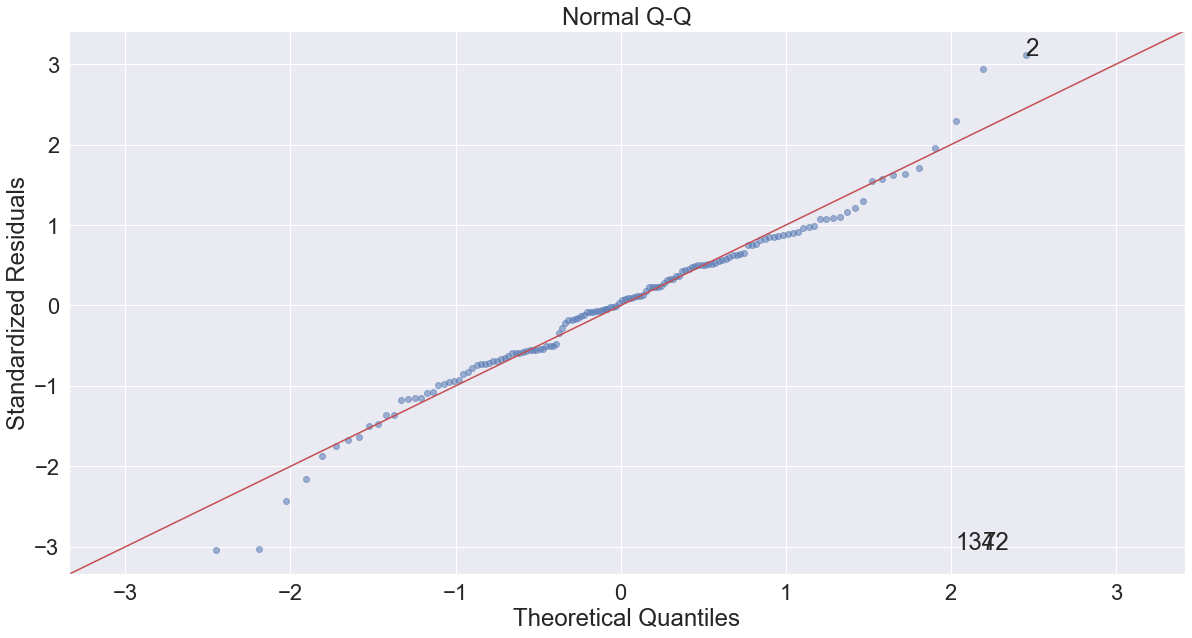

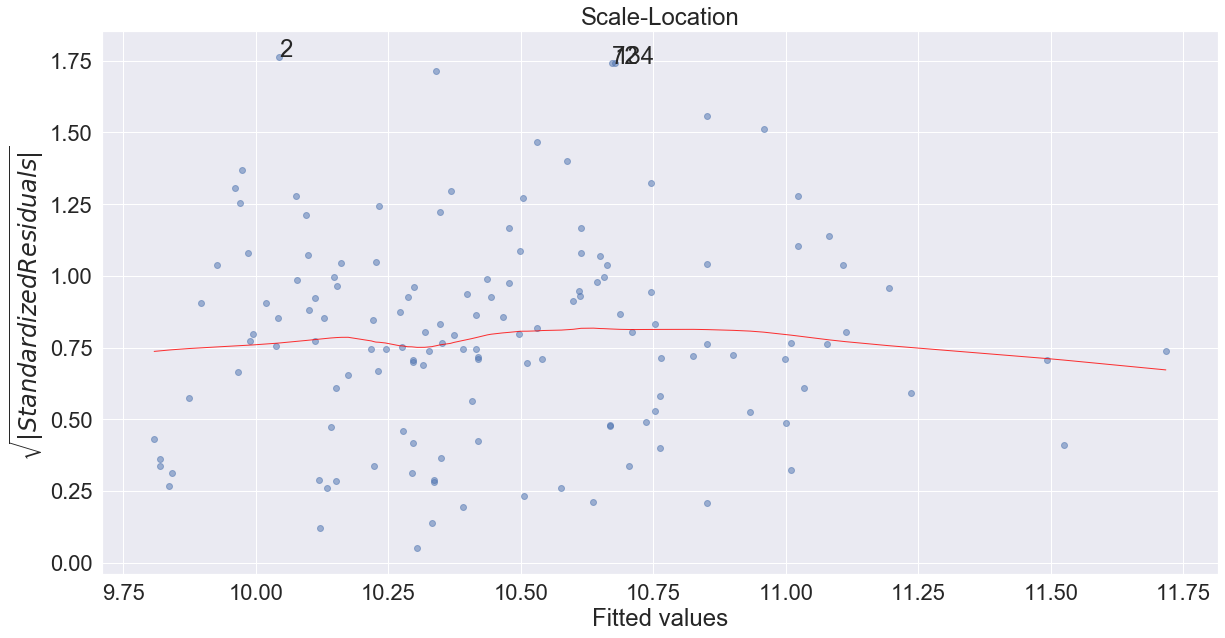

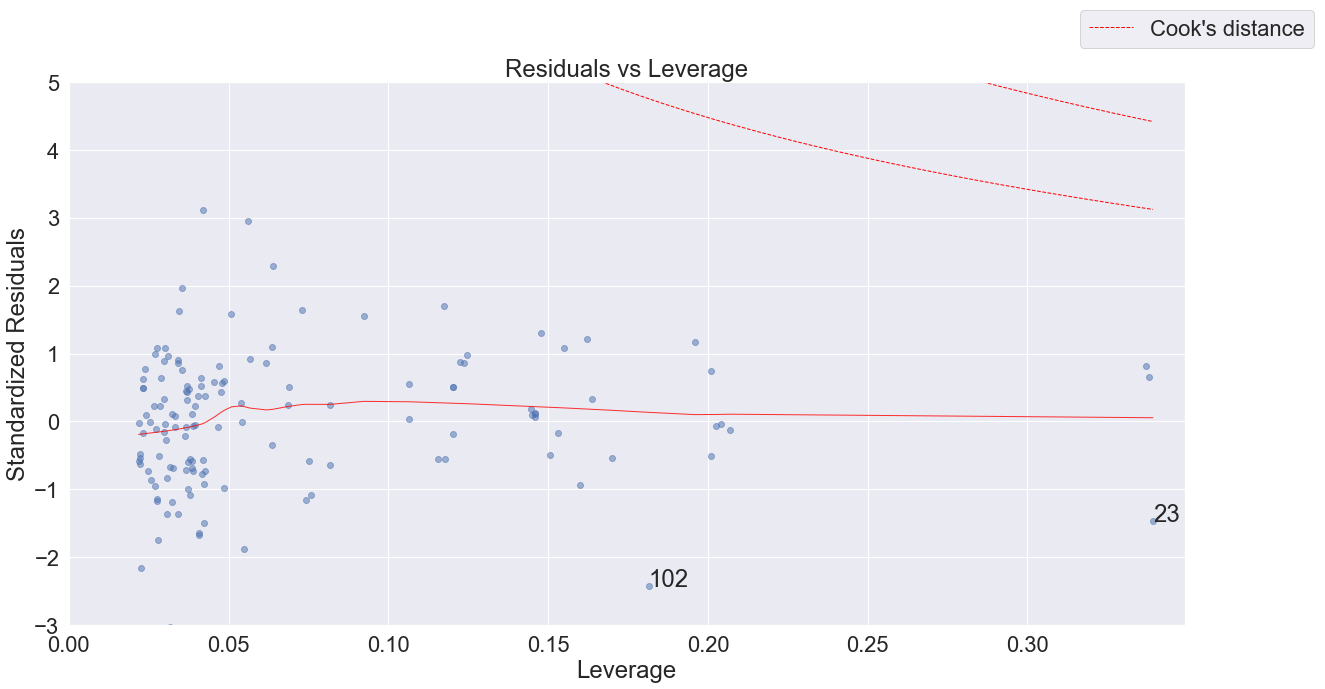

In [143]:
diagnostic_plots(df.drop("msrp", axis=1), df.msrp, best)

La gráfica de residuales contra valores ajustados no muestra patrones importantes salvo un poco de sobreajuste en las colas. Esto es normal, pues como se ve en la QQ y en el primer histograma de este documento, hay algunos autos con precio sustancialmente más alto que alargan las colas de la distribución.
Revisaremos los puntos problemáticos brevemente.

## Sección 5
### Comentario sobre pronósticos

## Dale emiliano la incorporación de la variable temporal y posibles cambios en el modelo.

In [144]:
test = pd.read_csv('http://allman.rhon.itam.mx/~ebarrios/EstApl2-2019/controles/control4/datosFin.csv')

In [147]:
test = test.drop(["carid", "carclass_id"], axis=1)
test["msrp"] = np.log(test.msrp)

In [149]:
test["efficient"] = test.mpgmpge > test.mpg
test["large"] = test.carclass == "L"

In [155]:
preds = best.predict(test)
real = test.msrp
compare = pd.DataFrame({"y": np.exp(real), "yhat": np.exp(preds)})

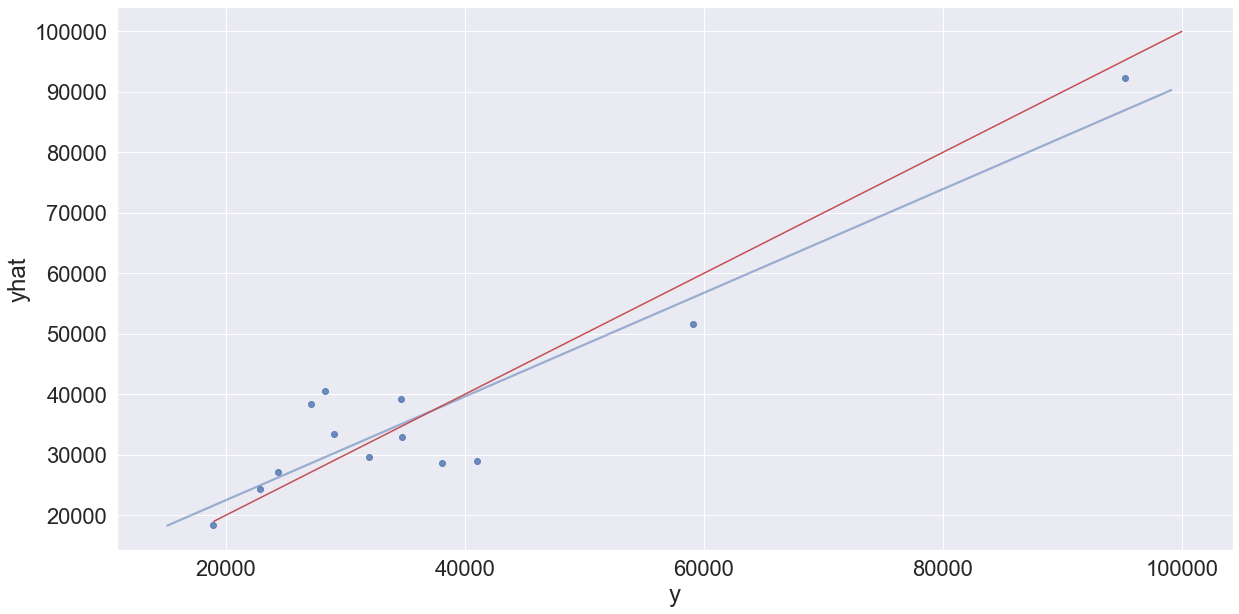

In [162]:
sns.regplot(x="y", y="yhat", data=compare, ci=None, line_kws={"alpha":0.5})
x = np.linspace(19000, 100000)
y = x
plt.plot(x, y, color="r")

Gráficamente parece que nos fue bastante bien, incluso en el valor extremo. A ver medidas numéricas.

El error cuadrático medio en los nuevos puntos

In [167]:
np.sum((real-preds)**2)/len(real)

0.04067307416718447

In [164]:
compmod = smf.ols("real ~ preds", data=compare).fit()

In [166]:
compmod.params

Intercept    0.640126
preds        0.937345
dtype: float64

La pendiente es $0.937$ contra el $1$ perfecto de la identidad. Buenísimos resultados.

## Sección 6
### Conclusiones

## Llenenle conclusiones
El ejercicio de pronosticar es un ejercicio interesante pues en el intentamos incorporar la mejor información posible para así lograr hacer una estimación de observaciones que aun no han sido realizadas. Lograr buenos modelos de este tipo es bastante complicado pero permite evaluar decisiones importantes. Es crucial el entendimiento de los regresores que tenemos en nuestra muestra pues estos son los responsables de informar a nuestro modelo de la mejor forma y su tratamiento puede hacer la diferencia, como se vio en nuestro proceso de selección de variables. 

El análisis exploratorio y el conocimiento del tema fueron los factores principales para ajustar un modelo que dio muy buenos resultados.Este proyecto fue un buen ejercicio de recopilar lo aprendido durante el semestre antero.

#### Apéndice

In [93]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');